<a href="https://colab.research.google.com/github/gusecuador/tratamientoDatos/blob/main/desafio2/PracticasTratamientoDatosGustavo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adquisión de vacunas COVID 19 compradas/donadas por marca y forma de adquisisión

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
#Obtener datos desde repositorio dedicado a seguimiento de todo lo referente a COVID 19 en Ecuador
datos = pd.read_csv('https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/fabricantes.csv')
df=pd.DataFrame(datos)
df.head()

,vaccine,total,arrived_at,contract
0,Pfizer/BioNTech,8190,20/01/2021,Government of Ecuador with Pfizer
1,Pfizer/BioNTech,16380,17/02/2021,Government of Ecuador with Pfizer
2,Pfizer/BioNTech,17550,24/02/2021,Government of Ecuador with Pfizer
3,Pfizer/BioNTech,31590,03/03/2021,Government of Ecuador with Pfizer
4,Sinovac,20000,06/03/2021,Donation from the Government of Chile to the G...


Tamaño del dataframe

In [6]:
df.shape

(56, 4)

Agrupamos vacunas por marca para graficar

<function matplotlib.pyplot.show>

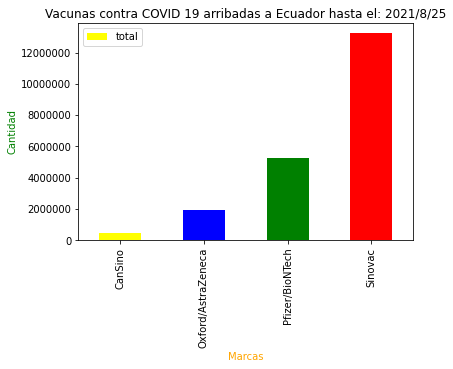

In [35]:
#Vamos a agrupar por marca de vacuna para graficar
import matplotlib.pyplot as plt
import time

#plt.figure(figsize=(5,5))
plt.ticklabel_format(style='plain')
df.groupby('vaccine')['total'].sum().plot(kind='bar',legend='reverse',color={'yellow','blue','green','red'})
plt.title("Vacunas contra COVID 19 arribadas a Ecuador hasta el: " + str(time.localtime().tm_year ) + "/"+ str(time.localtime().tm_mon,) + "/"+ str(time.localtime().tm_mday))
plt.ylabel("Cantidad",{'color':"green"})
plt.xlabel('Marcas',{'color':"orange"})
plt.show


Text(0.5, 0.98, 'Vacunas COVID que han llegado a Ecuador')

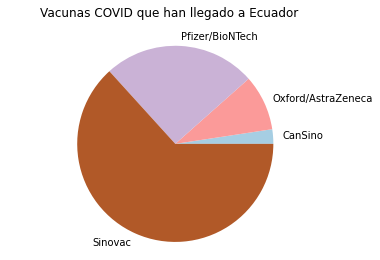

In [24]:
plt.ticklabel_format(style='plain')

df.total.groupby(df.vaccine).sum().plot(kind='pie',cmap='Paired')
plt.axis("equal")
plt.ylabel("")
plt.suptitle('Vacunas COVID que han llegado a Ecuador')

Utilizacion de plotly.express para graficar adquisición de vacunas COVID 19 agrupadas por marca.

In [27]:
import plotly.express as px
import matplotlib.pyplot as plt

fig = px.pie(df, values='total', names='vaccine', title='Marcas de vacunas arribadas a Ecuador hasta el momento')
fig.show()

Agrupacion por 2 columnas ordenado por cantidad de forma descendente.

In [25]:
#Agrupacion por 2 columnas ordenado por cantidad de forma descendente.
resumen=df.groupby(["vaccine","contract"]).sum('total').sort_values(by=['vaccine','total'], ascending=False)

resumen


total
vaccine            contract                                                    
Sinovac            Government of Ecuador with Sinovac                  13000000
                   Donation from the Government of China to the Go...    200000
                   Donation from the Government of Chile to the Go...     20000
                   Managed by Conmebol and donation by Sinovac             3520
Pfizer/BioNTech    Government of Ecuador with Pfizer                    2882949
                   Donation from United States Government               2000000
                   Government of Ecuador with COVAX                      379080
Oxford/AstraZeneca Government of Ecuador with AstraZeneca               1056000
                   Government of Ecuador with COVAX                      756000
                   Government of Ecuador with COVAX (Spain donated)      101760
CanSino            Government of Ecuador with CanSino                    500000

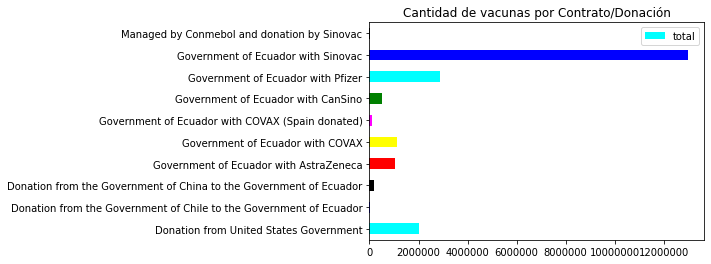

In [36]:
plt.ticklabel_format(style='plain')
df.groupby('contract')['total'].sum().plot(kind='barh',legend='reverse',color={'yellow','blue','red','green','black','cyan','magenta'})
plt.title('Cantidad de vacunas por Contrato/Donación')
plt.ylabel('')
plt.show()

Cantidad de Vacunas agrupadas por la forma de adquisión.

In [38]:
import plotly.express as px

fig = px.pie(df, values='total', names='contract', title='Cantidad de vacunas por Contrato/Donación')
fig.show()

In [ ]:
#cantidad de filas y columnas de matriz, en este caso 55 filas y 4 columnas
df.shape


Cantidad de vacunas aplicadas en Ecuador

In [45]:
import pandas as pd2
import matplotlib.pyplot as plt2
import seaborn as sb

datos2 = pd2.read_csv('https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/vacunas.csv')
df2=pd2.DataFrame(datos2)
df2.head()

,fecha,dosis_total,primera_dosis,segunda_dosis
0,21/01/2021,0,0,0
1,22/01/2021,108,108,0
2,27/01/2021,2982,2982,0
3,04/02/2021,6228,6228,0
4,17/02/2021,8190,6228,1962


In [46]:
df2.columns

Index(['fecha', 'dosis_total', 'primera_dosis', 'segunda_dosis'], dtype='object')

In [47]:
df2.shape

(138, 4)

In [48]:
df2.describe()

,dosis_total,primera_dosis,segunda_dosis
count,1.380000e+02,1.380000e+02,1.380000e+02
mean,4.552963e+06,3.238966e+06,1.313997e+06
std,4.960691e+06,3.467051e+06,1.606392e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.844335e+05,4.936065e+05,1.908270e+05
50%,2.488554e+06,1.679576e+06,8.089770e+05
75%,7.514230e+06,5.659702e+06,1.854528e+06
max,1.706771e+07,9.970890e+06,7.096816e+06


Cantidad total de dosis aplicadas es la suma de primera dosis + segunda dosis.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



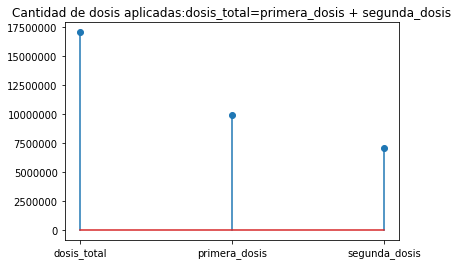

,dosis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,Total
0,dosis_total,0,108,2982,6228,8190,24492,42114,59316,71148,74472,75258,95915,123176,139359,141191,178970,182261,191179,230770,235000,244866,283106,301069,335093,356783,363255,480962,485132,514151,545132,554369,577711,601229,643702,675510,711204,732717,743937,765489,...,5619115,5786147,6383862,6890876,7281701,7591739,7882979,8178327,8467877,8707304,9055887,9295351,9510668,9677880,9880401,10051176,10295022,10584021,10929785,11221939,11419806,11732461,11917800,12138621,12384109,12649538,12883619,13351482,14097131,14363025,14578314,14684326,14742430,15516237,15879437,16235098,16500237,16693126,16835733,17067706
1,primera_dosis,0,108,2982,6228,6228,20784,35886,53088,64920,68244,69030,89687,116948,119222,121054,140765,143614,152526,172413,174642,182329,204902,211720,228504,244159,250631,338180,338180,354019,377199,384093,401871,421937,457403,486524,514854,532367,541420,555265,...,3933031,4088423,4629829,5079607,5447856,5730317,6001154,6281841,6551874,6778045,7087388,7302932,7494082,7648949,7828824,7960999,8148966,8368783,8642055,8884880,9047885,9269733,9358610,9446897,9524743,9585665,9637618,9929240,9944522,9945975,9955383,9956358,9956777,9958643,9960012,9961744,9963105,9963626,9964227,9970890
2,segunda_dosis,0,0,0,0,1962,3708,6228,6228,6228,6228,6228,6228,6228,20137,20137,38205,38647,38653,58357,60358,62537,78204,89349,106589,112624,112624,142782,146952,160132,167933,170276,175840,179292,186299,188986,196350,200350,202517,210224,...,1686084,1697724,1754033,1811269,1833845,1861422,1881825,1896486,1916003,1929259,1968499,1992419,2016586,2028931,2051577,2090177,2146056,2215238,2287730,2337059,2371921,2462728,2559190,2691724,2859366,3063873,3246001,3422242,4152609,4417050,4622931,4727968,4785653,5557594,5919425,6273354,6537132,6729500,6871506,7096816


In [51]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
plt.ticklabel_format(style='plain')
df=df2.T
df=df.drop(['fecha'])
df=df.reset_index()
df=df.rename({'index':'dosis',137:'Total'},axis=1)
plt.stem(df['dosis'],df['Total'])
plt.title('Cantidad de dosis aplicadas:dosis_total=primera_dosis + segunda_dosis')
plt.show()
df.head()
df


Cantidad de personas fallecidas por COVID 19, agrupadas por provincias del Ecuador.

In [53]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/muertes/provincias.csv')

df=df.loc[df["created_at"].between('23/07/2021', '24/08/2021')]
df
fig = px.pie(df, values='total', names='provincia', title='Porcentaje de fallecidos por COVID 19 en Ecuador por provincia')
fig.show()

Cantidad de fallecimientos por provincias

In [58]:
df.head()

,provincia,poblacion,total,nuevas,probables,lat,lng,created_at
552,Azuay,881394,249,0,20,-2.897414,-79.004481,24/01/2021
553,Bolívar,209933,73,0,15,-1.605556,-79.003056,24/01/2021
554,Carchi,186869,156,2,2,0.812180,-77.716330,24/01/2021
555,Cañar,281396,108,0,6,-2.733333,-78.833333,24/01/2021
556,Chimborazo,524004,366,0,124,-1.674347,-78.648294,24/01/2021


In [66]:
df.shape

(168, 8)